Part 1
Importing the CSV File and finding some statistical data related to it



    YearsExperience     Salary
0               8.1   77884.67
1              19.1  127213.68
2              14.9  103343.52
3              12.4   88988.96
4               4.0   35214.78
5               4.0   42801.56
6               2.1   35893.61
7              17.5  128071.22
8              12.4   95436.18
9              14.5   84869.60
10              1.4   40240.84
11             19.4  123149.18
12             16.8  107230.78
13              5.0   61116.76
14              4.5   62810.00
15              4.5   61812.80
16              6.8   55607.82
17             11.0   81907.88
18              9.2   79312.63
19              6.5   72255.45
20             12.6   88208.26
21              3.7   46643.41
22              6.6   51936.65
23              8.0   58037.93
24              9.7   86625.26
25             15.9  123062.40
26              4.8   53279.90
27             10.8   94035.33
28             12.3   95116.36
29              1.9   33048.80
30             12.5   96113.96
31      

<Axes: xlabel='YearsExperience', ylabel='Salary'>

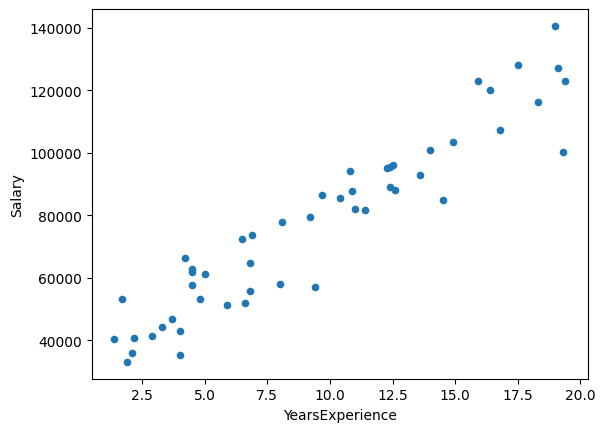

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/extended_salary_data.csv')
print(df)
print("Mean of years experience is " + str(np.mean(df['YearsExperience'])))
print("Median of years experience is " + str(np.median(df['YearsExperience'])))
print("Variance of years experience is " + str(np.var(df['YearsExperience'])))
print("Mean of salary is " + str(np.mean(df['Salary'])))
print("Median of salary is " + str(np.median(df['Salary'])))
print("Variance of salary is " + str(np.var(df['Salary'])))
df.plot.scatter(x='YearsExperience', y='Salary')



Part 2 and 3

Data importing and plotting(Scatter plot)
Here I have divided the dataframe into 1 - 40 as the training set and 41 - 50 as testing data set. Albeit the data is definitely less to train a good model but using what we have we have made use of what we have.
I have also included various comments which I have used what I have used and developed my own way of running through these iterations also found the minimum number of iterations that had to be done.
Along with that I have shown a predicted scatter plot and shown it alongside the actual salaries by training it on the given dataset as mentioned above.



Number of iterations are 6134
29576.27812633817
5013.772730501444


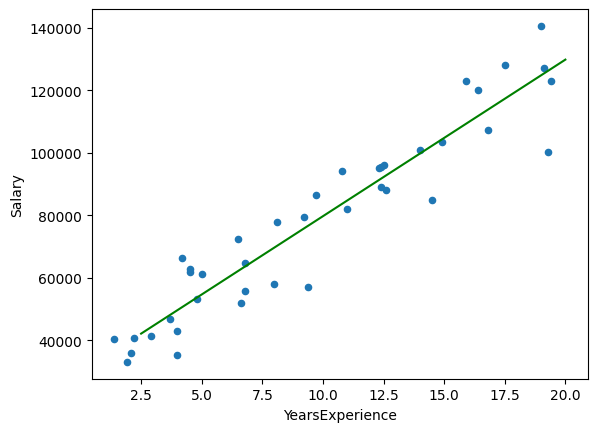

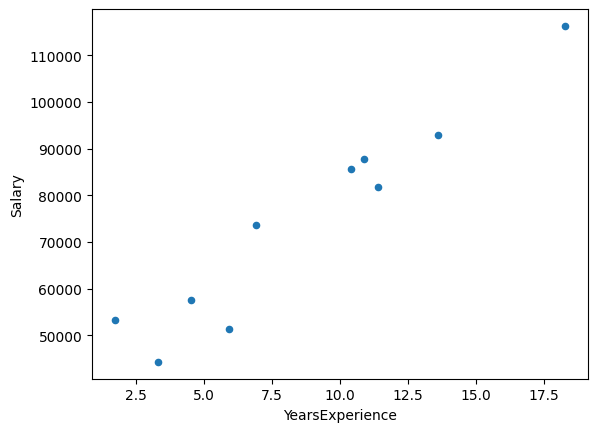

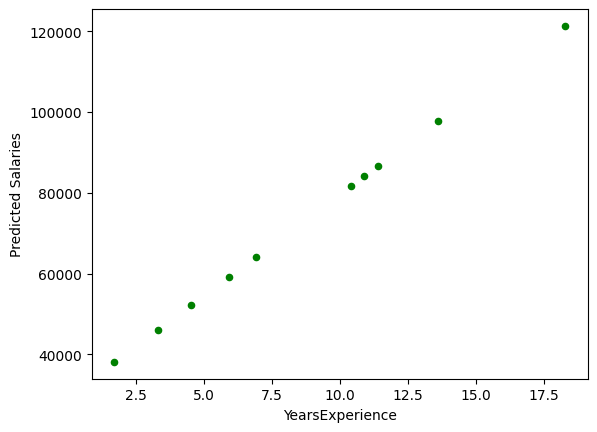

MSE IS 51456870.90502545
MAE IS 6195.308642207614


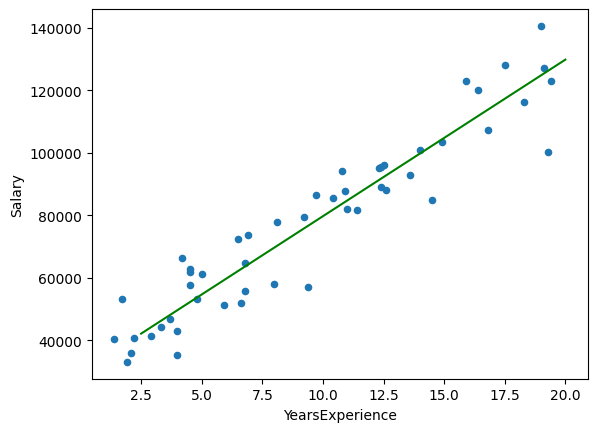

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/extended_salary_data.csv')
#For training this model let the predicted value be a f(b1,b2) = b1 + b2.x = f(x) now the value sum [f(x) - f(xi)]**2/2n = the usable function now using some calculus we can take a partial derivative and for minimising take the delta f tend to 0, sum [f(x) - f(xi)]/m*(-alpha) + (b1)((n - 1)th iteration) = (b1)(n the iteration)
#sum [f(x) - f(xi)]/m*(-alpha)*xi + (b2)((n - 1)th iteration) = (b2)(n the iteration)
#Lets create a simple restriction to minimise the MSE = [f(x) - f(xi)]**2/n
df_training = df.head(40)
df_testing = df.tail(10)
b1 = 0
b2 = 0
a = 0.01 #The lower the alpha value the better note this would be computationally intensive pretty quickly if we try to lower this too much
MSE = 0
func = 0
func2 = 0
sum = 0
t = 0
temp1 = 0
temp2 = 0
fix = 6961988489.563618 #Identified MSE from first iteration
arr = df_training.to_numpy()
while(1 == 1):
    for i in range(0, 40, 1):
       MSE = (arr[i][1] - b1 - b2*arr[i][0])**2/40 + MSE
    for i in range(0, 40, 1):
      func = (arr[i][1] - b1 - b2*arr[i][0])/40 + func
    for i in range(0, 40, 1):
      func2 = (arr[i][1] - b1 - b2*arr[i][0])*arr[i][0]/40 + func2
    t = t + 1
    b1 = b1 + (a)*func
    b2 = b2 + (a)*func2
    for i in range(0, 40, 1):
      sum = (arr[i][1] - b1 - b2*arr[i][0])**2/40 + sum
    if(sum > MSE):
      break
    func = 0
    func2 = 0
    MSE = 0
    sum = 0
    temp1 = b1
    temp2 = b2
print("Number of iterations are" , t)
print(temp1)
print(temp2)
x = np.linspace(2.5, 20)
obj1 = df_training.plot.scatter(x='YearsExperience', y='Salary')
obj2 = plt.plot(x, temp1 + temp2 * x, color='green')
plt.show()
arr3 = []
arr2 = df_testing.to_numpy()
for i in range(0, 10, 1):
  arr3.append(arr2[i][0]*temp2 + temp1)
df_testing.insert(2, "Predicted Salaries", arr3)
obj3 = df_testing.plot.scatter(x='YearsExperience', y='Salary')
obj4 = df_testing.plot.scatter(x='YearsExperience', y = 'Predicted Salaries', color='green')
plt.show()
fin_sum_a = 0
fin_sum_b = 0
for i in range(10):
  fin_sum_a = fin_sum_a + (arr2[i][1] - arr3[i])**2
print("MSE IS", fin_sum_a/10)
for i in range(10):
  fin_sum_b = fin_sum_b + abs((arr2[i][1] - arr3[i]))
print("MAE IS", fin_sum_b/10)
obj1 = df.plot.scatter(x='YearsExperience', y='Salary')
obj2 = plt.plot(x, temp1 + temp2 * x, color='green')
plt.show()


Bonus Task
Here we are going to make a multiple regression model.
Multiple regression model is actually dependent on multiple variables that is why we need the governing function fp(x1,x2) = b1 + b2x1 + b3x2

Let's now use this function


    YearsExperience     Salary  NumProjects
0               8.1   77884.67           23
1              19.1  127213.68           52
2              14.9  103343.52           41
3              12.4   88988.96           34
4               4.0   35214.78           12
5               4.0   42801.56           12
6               2.1   35893.61            7
7              17.5  128071.22           48
8              12.4   95436.18           34
9              14.5   84869.60           40
10              1.4   40240.84            5
11             19.4  123149.18           53
12             16.8  107230.78           46
13              5.0   61116.76           15
14              4.5   62810.00           13
15              4.5   61812.80           13
16              6.8   55607.82           19
17             11.0   81907.88           31
18              9.2   79312.63           26
19              6.5   72255.45           19
20             12.6   88208.26           35
21              3.7   46643.41  

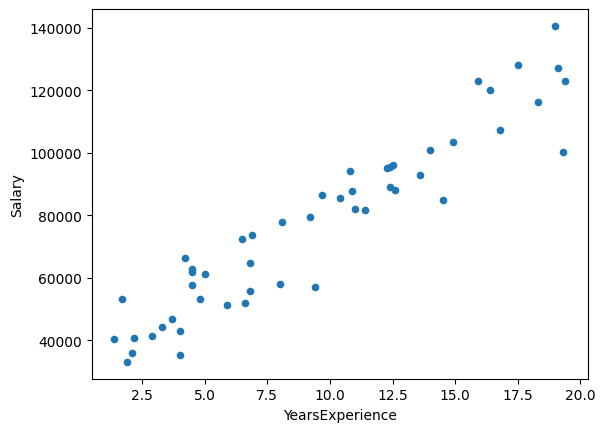

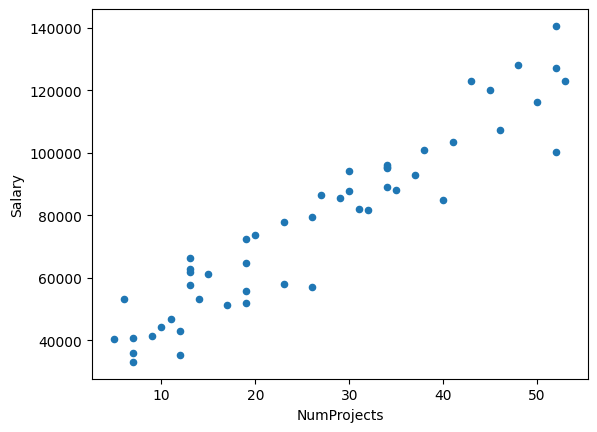

Number of iterations are 10001
23349.034983558075
-9350.969034596803
5381.7229642468565


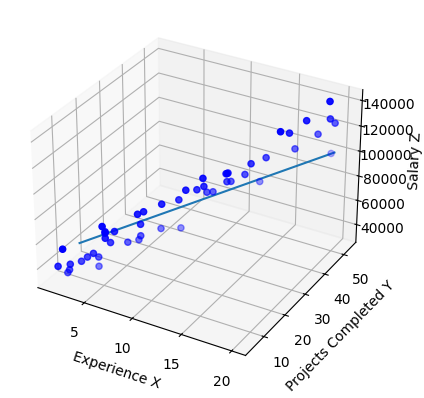

MSE is 81740058.88697743
MAE is 7430.395498343634


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
df = pd.read_csv('/content/extended_salary_data.csv')
df.plot.scatter(x='YearsExperience', y='Salary')
arr2 = [23, 52, 41, 34, 12, 12, 7, 48, 34, 40, 5, 53, 46, 15, 13, 13, 19, 31,
 26, 19, 35, 11, 19, 23, 27, 43, 14, 30, 34, 7, 34, 13,  7, 52, 52, 45,
 19, 9, 38, 26, 10, 29,  6, 50, 17, 37, 20, 30, 32, 13]
df.insert(2, 'NumProjects', arr2)
print(df)
df.plot.scatter(x='NumProjects', y='Salary')
arr = df.to_numpy()
plt.show()
b1 = 0
b2 = 0
b3 = 0
a = 0.0019 #The lower the alpha value the better note this would be computationally intensive pretty quickly if we try to lower this too much
MSE = 0
func = 0
func2 = 0
func3 = 0
sum = 0
t = 0
temp1 = 0
temp2 = 0
temp3 = 0

while(1 == 1):
    for i in range(0, 50, 1):
       MSE = (arr[i][1] - b1 - b2*arr[i][0] - b3*arr[i][2])**2/50 + MSE
       func = (arr[i][1] - b1 - b2*arr[i][0] - b3*arr[i][2])/50 + func
       func2 = (arr[i][1] - b1 - b2*arr[i][0] - b3*arr[i][2])*arr[i][0]/50 + func2
       func3 = (arr[i][1] - b1 - b2*arr[i][0] - b3*arr[i][2])*arr[i][2]/50 + func3
    t = t + 1
    b1 = b1 + (a)*func
    b2 = b2 + (a)*func2
    b3 = b3 + (a)*func3
    for i in range(0, 50, 1):
      sum = (arr[i][1] - b1 - b2*arr[i][0] - b3*arr[i][2])**2/50 + sum
    if(sum > MSE):
      break
    elif(t > 10000): #You can remove this if you want to see the training time akes approx 5 mins depends on your computer
      break
    func = 0
    func2 = 0
    func3 = 0
    MSE = 0
    sum = 0
    temp1 = b1
    temp2 = b2
    temp3 = b3
print("Number of iterations are" , t)
print(temp1)
print(temp2)
print(temp3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = arr[:, 0:1]
y_vals = arr[:, 2:3]
z_vals = arr[:, 1:2]
x = np.linspace(2.5, 20)
y = np.linspace(10, 50)

ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax.set_xlabel('Experience X')
ax.set_ylabel('Projects Completed Y')
ax.set_zlabel('Salary Z')
ax.plot(x, y, temp1 + x*temp2 + temp3*y)
plt.show()

print("MSE is", MSE)
finalsum = 0
for i in range(50):
  finalsum = finalsum + abs((arr[i][1] - b1 - b2*arr[i][0] - b3*arr[i][2]))
print("MAE is", finalsum/50)
#It is clear that the performance is this model is a tad bit worse and takes much more training time here we have just done 100000 iterations but it can be much more than that and an ideal solution cannot be found much more time can be taken to find an ideal solution normalisation and other efficient algs can be used which cannot be touched upon right now.
#Note we reduce the learning rates because the it requires much finer adjustments to work
#If you want a better training time try running this on a computer with more threads, or dedicate more threads to this process